<a href="https://colab.research.google.com/github/colegarcodes/ORIE3120-Group-Project/blob/main/ORIE3120_Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving cleaned_sprint_results.csv to cleaned_sprint_results.csv


In [25]:
sprint = pd.read_csv('cleaned_sprint_results.csv')
sprint.head(5)

,resultId,raceId,driverId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapTime,statusId,fastestLapRank
0,1,1061,830,9,2,1,3,17,14,0 days 00:01:30.013000,1,3
1,2,1061,1,131,1,2,2,17,17,0 days 00:01:29.937000,1,1
2,3,1061,822,131,3,3,1,17,17,0 days 00:01:29.958000,1,2
3,4,1061,844,6,4,4,0,17,16,0 days 00:01:30.163000,1,4
4,5,1061,846,1,6,5,0,17,16,0 days 00:01:30.566000,1,5


In [26]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_results.csv to cleaned_results.csv


In [27]:
results = pd.read_csv('cleaned_results.csv')
results.head(5)

,resultId,raceId,driverId,constructorId,grid_position,position,points,laps,fastestLap,fastestLapRank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,1,1,10.0,58,39,2,0 days 00:01:27.452000,218.300,1
1,2,18,2,2,5,2,8.0,58,41,3,0 days 00:01:27.739000,217.586,1
2,3,18,3,3,7,3,6.0,58,41,5,0 days 00:01:28.090000,216.719,1
3,4,18,4,4,11,4,5.0,58,58,7,0 days 00:01:28.603000,215.464,1
4,5,18,5,1,3,5,4.0,58,43,1,0 days 00:01:27.418000,218.385,1


In [70]:
sprint_columns = sprint[sprint['points'] >= 1][['driverId', 'points']]
sprint_columns.head(5)

,driverId,points
0,830,3
1,1,2
2,822,1
20,822,3
21,830,2


In [63]:
results_columns = results[['driverId', 'points']]
results_columns.head(5)

,driverId,points
0,1,10.0
1,2,8.0
2,3,6.0
3,4,5.0
4,5,4.0


In [71]:
grouped_sprint = sprint_columns.groupby('driverId')['points'].sum().reset_index()
grouped_sprint.head(10)

,driverId,points
0,1,13
1,4,7
2,807,3
3,815,29
4,817,4
5,822,9
6,825,4
7,830,50
8,832,34
9,839,5


In [72]:
grouped_results = results_columns.groupby('driverId')['points'].sum().reset_index()
grouped_results.head(10)

,driverId,points
0,1,4540.5
1,2,259.0
2,3,1594.5
3,4,2203.0
4,5,105.0
5,6,9.0
6,7,6.0
7,8,1873.0
8,9,274.0
9,10,51.0


In [73]:
merged_df = grouped_sprint.merge(grouped_results, on='driverId', how='inner')
merged_df = merged_df.rename(columns={'points_x': 'sprint_points', 'points_y': 'season_points'})
merged_df.head(20)

,driverId,sprint_points,season_points
0,1,13,4540.5
1,4,7,2203.0
2,807,3,527.0
3,815,29,1361.0
4,817,4,1307.0
5,822,9,1783.0
6,825,4,181.0
7,830,50,2275.5
8,832,34,840.5
9,839,5,394.0


Text(0, 0.5, 'Total Season Points')

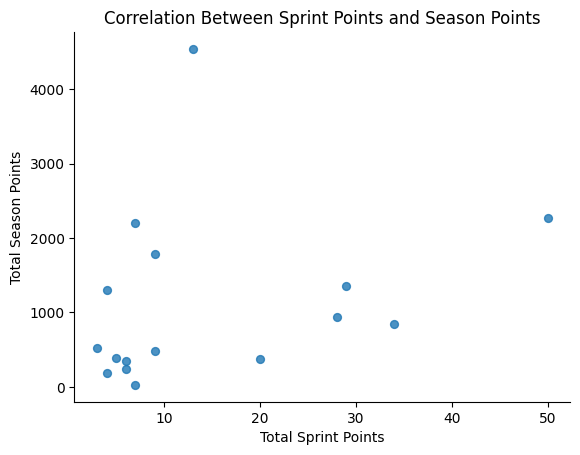

In [75]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='sprint_points', y='season_points', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Correlation Between Sprint Points and Season Points")
plt.xlabel("Total Sprint Points")
plt.ylabel("Total Season Points")